In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC


classes = pd.read_csv("data/bio-pathways-diseaseclasses.csv")
name_to_class = {row["Disease Name"]: row["Disease Class"] for _, row in classes.iterrows()}
classes = set(name_to_class.values())
classes_to_n = {class_: i for i, class_ in enumerate(classes)}
features = pd.read_csv("data/bio-pathways-features.csv").dropna()
motifs = pd.read_csv("data/bio-pathways-diseasemotifs.csv").dropna()


In [94]:
y = features.loc[:, "Disease Name"].apply(lambda x: name_to_class.get(x)).dropna()
y = y.apply(lambda x: classes_to_n[x])
X = features.loc[y.index,:].iloc[:,2:]
X.shape, y.shape

((297, 5), (297,))

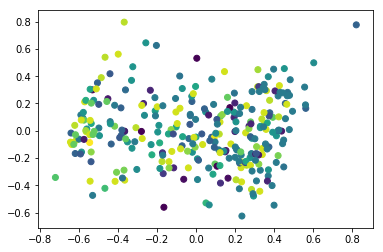

In [95]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)
plt.scatter(Xp[:,0], Xp[:, 1], c=y)

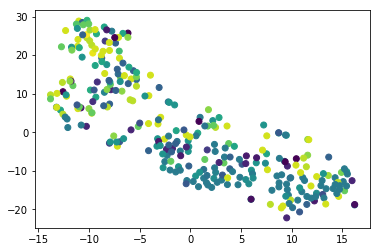

In [102]:
tsne = TSNE(n_components=2)
Xpp = tsne.fit_transform(X)
plt.scatter(Xpp[:,0], Xpp[:, 1], c=y)

In [98]:
# accuracy using features
svc = SVC(kernel="linear")
svc.fit(X, y).score(X, y)

0.28619528619528617

In [100]:
y = motifs.loc[:, "Disease Name"].apply(lambda x: name_to_class.get(x)).dropna()
y = y.apply(lambda x: classes_to_n[x])
X = motifs.loc[y.index,:].iloc[:,2:]
X.shape, y.shape

((300, 73), (300,))

In [101]:
# accuracy using motifs
svc.fit(X, y).score(X, y)

0.47